In [1]:

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors


# Set up some parameters for pretty plots
plt.rcParams.update({
    'figure.dpi': 200,
    "text.usetex": True,
    "pgf.rcfonts": False,
    "font.family": "serif",
    "font.size": 15,
    "xtick.labelsize": 11,
    "ytick.labelsize": 11,
    "legend.fontsize": 11,
    "figure.max_open_warning": False,
})


In [3]:
def lpp_norm(x, p):
    return (x ** 2) ** (p / 2)

# Your arg_prox_p function
def arg_prox_p(x, v, p):
    return lpp_norm(x, p) + 0.5 * (x - v) ** 2

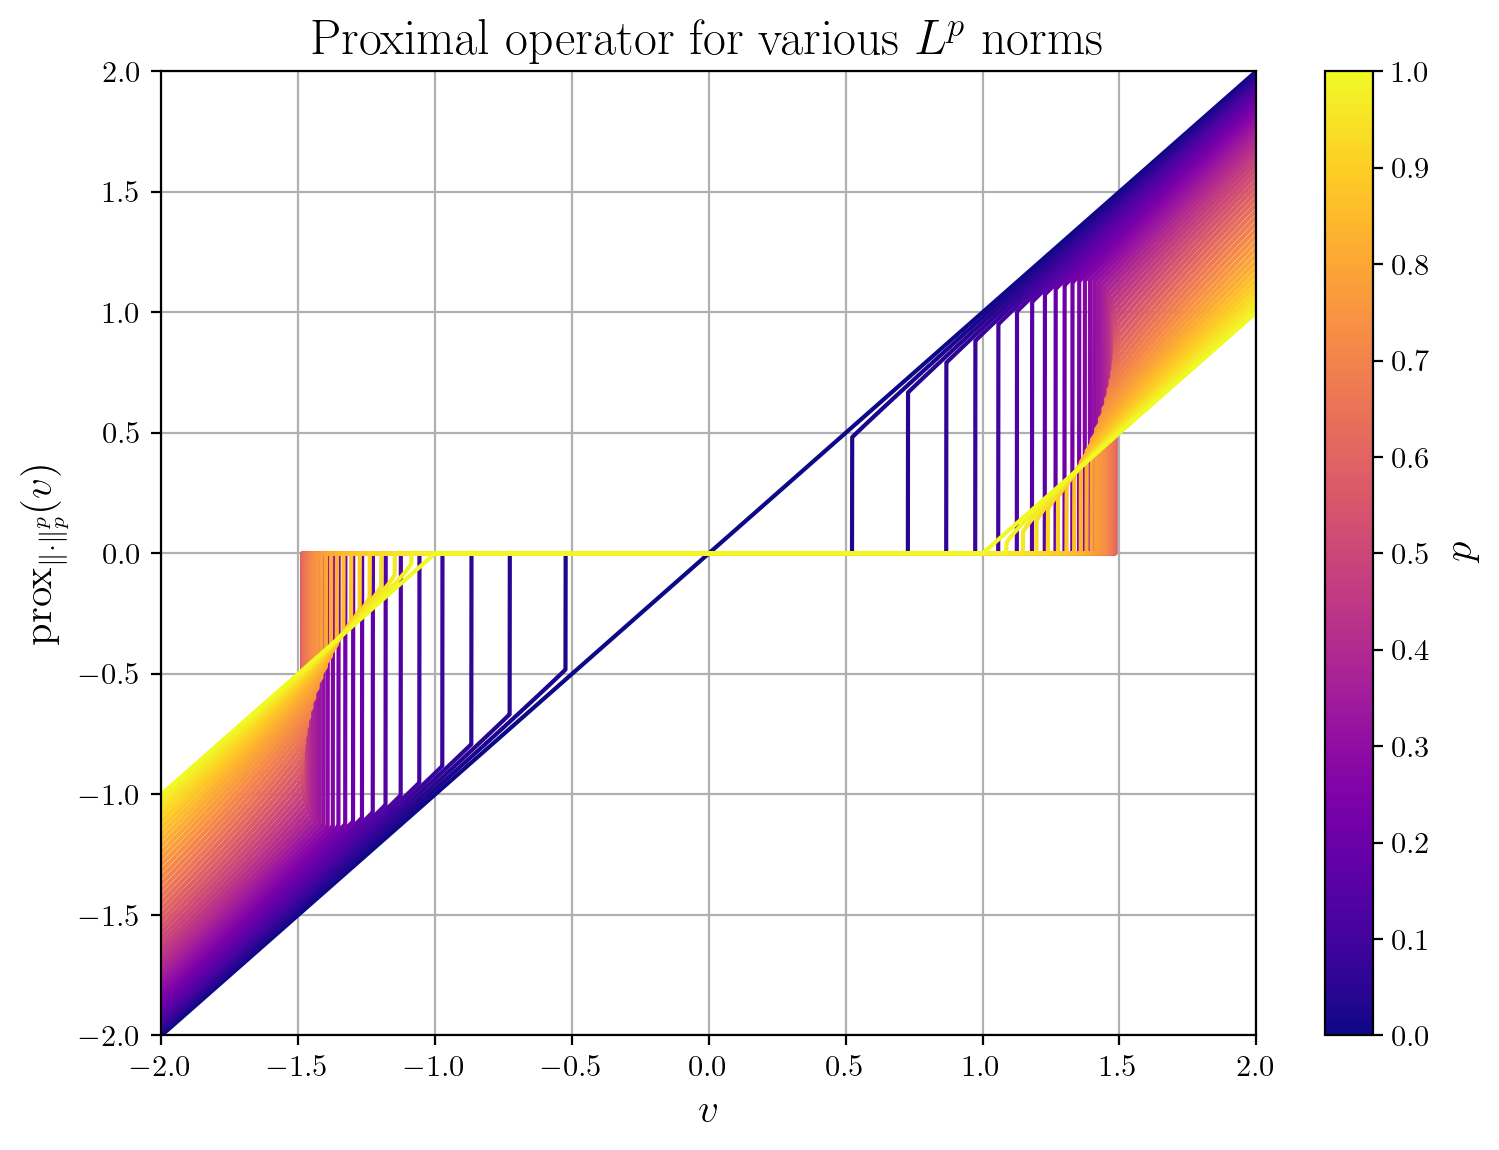

In [4]:
# First Plot
x_values = np.linspace(-2, 2, 6000)
v_values = np.linspace(-2, 2, 6000)
X, V = np.meshgrid(x_values, v_values)

num_lines = 50
p_values = np.linspace(0, 1, num_lines)

fig, ax1 = plt.subplots(figsize=(8, 6))

colormap = plt.cm.plasma
norm = mcolors.Normalize(vmin=0, vmax=1)
for p in p_values:
    Z = arg_prox_p(X, V, p)
    argmin_x = x_values[np.argmin(Z, axis=1)]
    ax1.plot(v_values, argmin_x, color=colormap(norm(p)))

sm = plt.cm.ScalarMappable(cmap=colormap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax1, ticks=np.linspace(0, 1, 11))
cbar.set_label('$p$')

ax1.set_xlabel('$v$')
ax1.set_ylabel('$\\mathrm{prox}_{\\Vert \\cdot \\Vert _p^p}(v)$')
ax1.set_title('Proximal operator for various $L^p$ norms')
ax1.grid(True)
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.tight_layout()
plt.show()


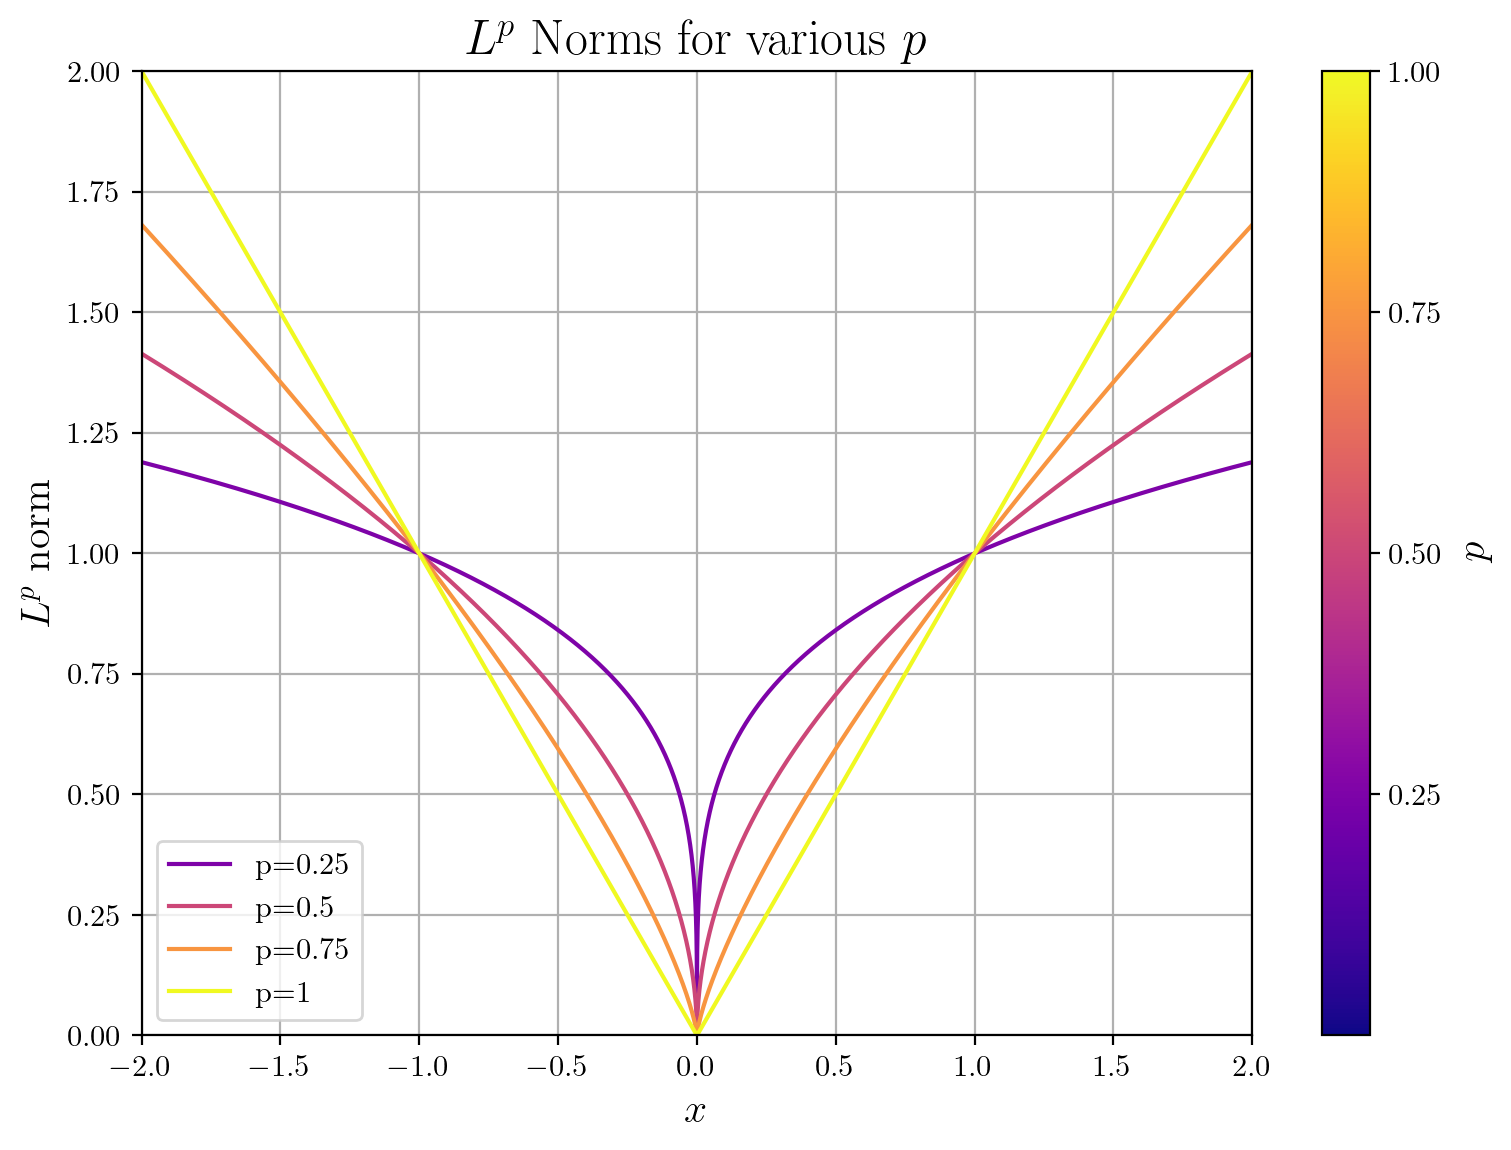

In [6]:
# Second Plot
fig, ax2 = plt.subplots(figsize=(8, 6))

selected_p_values = [1, 0.75, 0.5, 0.25]
x_lis = np.linspace(-2, 2, 100000)

norm = mcolors.Normalize(vmin=0, vmax=1)  # Using the same normalization
for p in selected_p_values[::-1]:
    ax2.plot(x_lis, lpp_norm(x_lis, p), label=f'p={p}', color=colormap(norm(p)))

sm = plt.cm.ScalarMappable(cmap=colormap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax2, ticks=selected_p_values)
cbar.set_label('$p$')

ax2.set_xlabel('$x$')
ax2.set_ylabel('$L^p$ norm')
ax2.set_title('$L^p$ Norms for various $p$')
ax2.legend()
ax2.grid(True)
plt.xlim(-2, 2)
plt.ylim(0, 2)
plt.tight_layout()
plt.show()

/var/folders/z_/my68xnz518q209q2dmd7dgcr0000gn/T/ipykernel_98697/1322334735.py:64: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


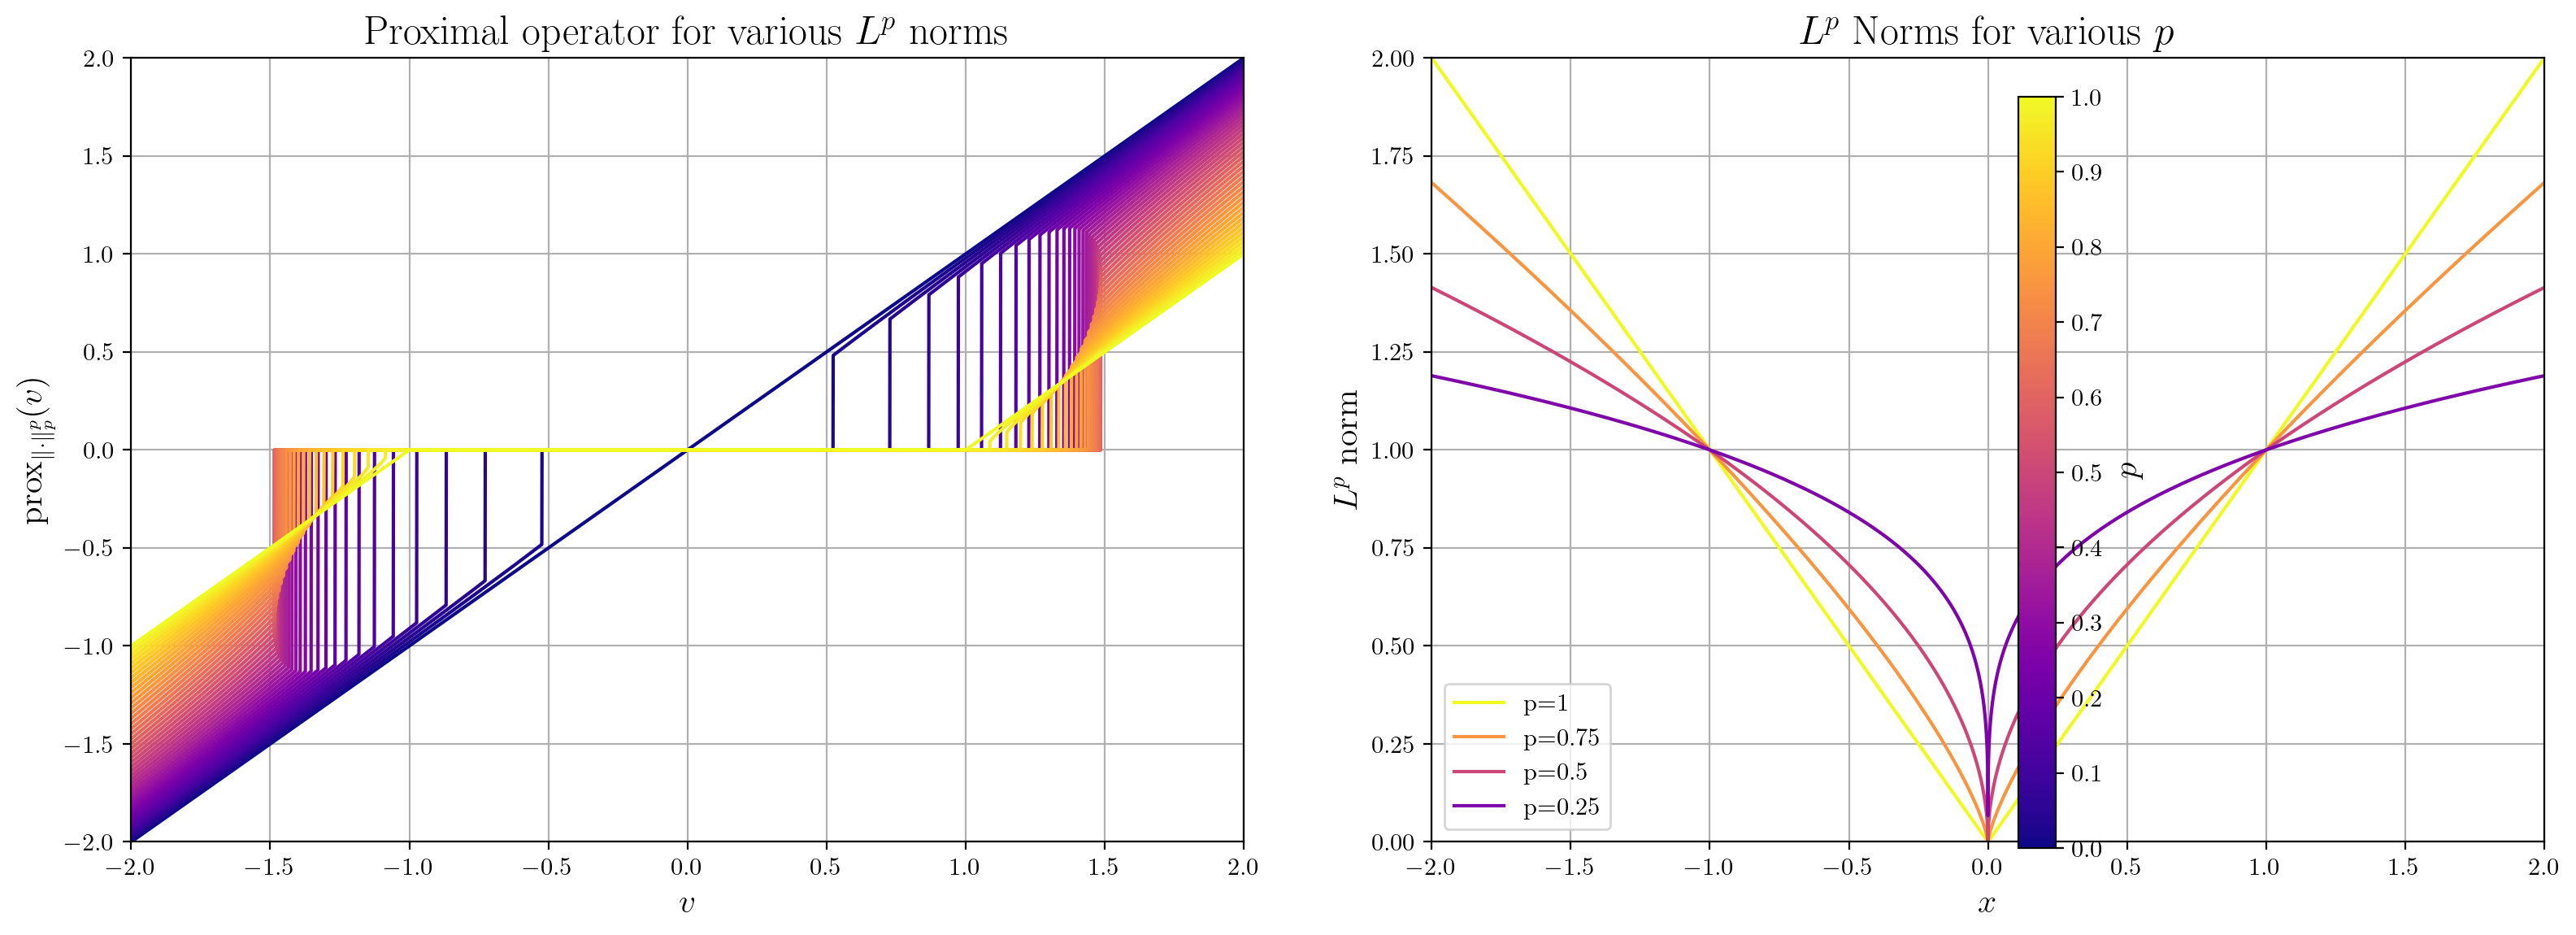

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Your lpp_norm function
def lpp_norm(x, p):
    return (x ** 2) ** (p / 2)

# Your arg_prox_p function
def arg_prox_p(x, v, p):
    return lpp_norm(x, p) + 0.5 * (x - v) ** 2

# Generating the meshgrid for the first plot
x_values = np.linspace(-2, 2, 6000)
v_values = np.linspace(-2, 2, 6000)
X, V = np.meshgrid(x_values, v_values)

# Generate list of p values between 0 and 1 for the first plot
num_lines = 50
p_values = np.linspace(0, 1, num_lines)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))  # Create a subplot with 1 row and 2 columns

# Colormap for both plots
colormap = plt.cm.plasma

# First Plot
norm = mcolors.Normalize(vmin=0, vmax=1)
for p in p_values:
    Z = arg_prox_p(X, V, p)
    argmin_x = x_values[np.argmin(Z, axis=1)]
    ax1.plot(v_values, argmin_x, color=colormap(norm(p)))

# Second Plot
selected_p_values = [1, 0.75, 0.5, 0.25]
x_lis = np.linspace(-2, 2, 100000)
for p in selected_p_values:
    ax2.plot(x_lis, lpp_norm(x_lis, p), label=f'p={p}', color=colormap(norm(p)))

# Common colorbar
sm = plt.cm.ScalarMappable(cmap=colormap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=[ax1, ax2], orientation='vertical', ticks=np.linspace(0, 1, 11))
cbar.set_label('$p$')

# Labels and titles
ax1.set_xlabel('$v$')
ax1.set_ylabel('$\\mathrm{prox}_{\\Vert \\cdot \\Vert _p^p}(v)$')
ax1.set_title('Proximal operator for various $L^p$ norms')
ax1.grid(True)

ax2.set_xlabel('$x$')
ax2.set_ylabel('$L^p$ norm')
ax2.set_title('$L^p$ Norms for various $p$')
ax2.legend()
ax2.grid(True)

# Plot limits
ax1.set_xlim(-2, 2)
ax1.set_ylim(-2, 2)
ax2.set_xlim(-2, 2)
ax2.set_ylim(0, 2)

plt.tight_layout()
plt.show()
